# OCR Projeto 01: Reconhecimento de texto em imagens de um diretório (busca por termos específicos)

- Buscar termos específicos
- Salvar os resultados em um arquivo (.txt)
- Mostrar os resultados sobre a imagem e salvar as imagens processadas em uma nova pasta

# Instalando o Tesseract

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract 

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/master/por.traineddata?raw=true

# Importando as bibliotecas

In [ ]:
import pytesseract
from pytesseract import Output
import numpy as np
import cv2
import os
import re
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow 
from PIL import ImageFont, ImageDraw, Image

# Conectando com o Google Drive e visualizando as imagens

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -R /content/gdrive/MyDrive/Cursos\ -\ recursos/OCR\ com\ Python/Imagens/Projeto1 imagens/ 

In [ ]:
diretorio_imgs = "imagens/"
caminhos = [os.path.join(diretorio_imgs, f) for f in os.listdir(diretorio_imgs)]
print(caminhos)

['imagens/ebook_sistemasoperacionais.jpg', 'imagens/prefacio_tanenbaum.jpg', 'imagens/referencias_artigo.jpg', 'imagens/artigo_introducao_vc.jpg', 'imagens/imagens2']


In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

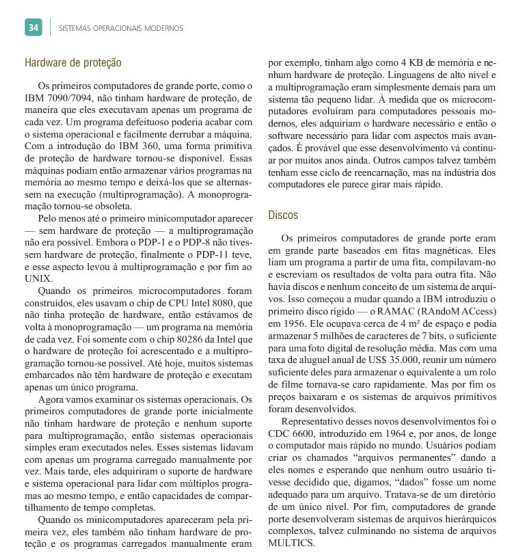

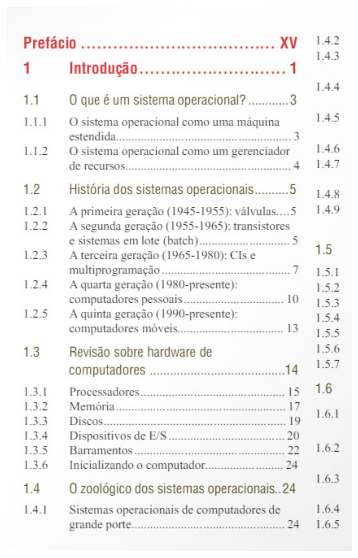

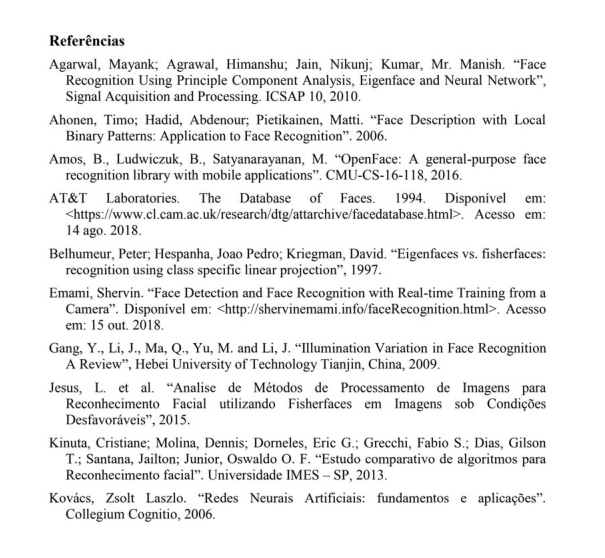

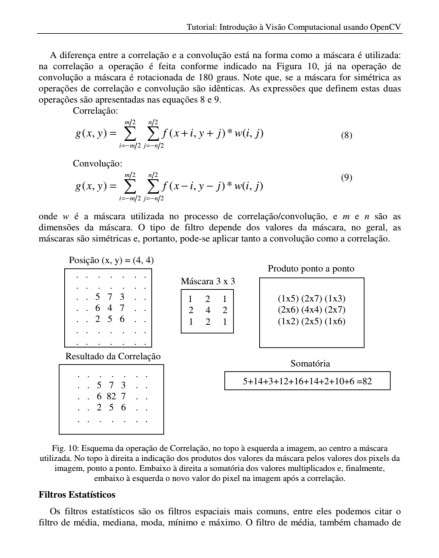

In [ ]:
for imagem in caminhos:
  if imagem == 'imagens/imagens2':
    continue
  
  imagem = cv2.imread(imagem) 
  mostrar(imagem)

# Configuração do Tesseract

In [ ]:
config_tesseract = "--tessdata-dir tessdata"

In [ ]:
def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto

# OCR - Reconhecimento no texto

In [ ]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt'

In [ ]:
for imagem in caminhos:
  if imagem == 'imagens/imagens2':
    continue
  
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  #print(nome_imagem)
  nome_divisao = '===================\n' + str(nome_imagem)
  #print(nome_divisao)
  texto_completo = texto_completo + nome_divisao + '\n'
  
  texto = OCR_processa(img, config_tesseract)
  #print(texto)
  texto_completo = texto_completo + texto

In [ ]:
texto_completo

'===================\nebook_sistemasoperacionais.jpg\n===================\nprefacio_tanenbaum.jpg\n===================\nreferencias_artigo.jpg\n===================\nartigo_introducao_vc.jpg\n===================\nebook_sistemasoperacionais.jpg\n===================\nprefacio_tanenbaum.jpg\n===================\nreferencias_artigo.jpg\n===================\nartigo_introducao_vc.jpg\n===================\nebook_sistemasoperacionais.jpg\nHardware de proteção\n\nOs primeiros computadores de grande porte, como o\n1BM 7090/7094, não tinham hardware de proteção, de\nmaneira que eles exccutavam apenas um programa de\ncada vez. Um programa defeituoso poderia acabar com\n0 sistema operacional e facilmente derrubar a máquina.\n\nCom a introdução do IBM 360, uma forma primitiva\nde proteção de hardware tornou-se disponível. Essas\nmáquinas podiam então armazenar vários programas na\nmemória ao mesmo tempo e deixá-los que se alternas-\n\nsem na execução (multiprogramação). À monoprogra-\nmação tornou-se

## Salvando em um txt

In [ ]:
arquivo_txt = open(nome_txt, 'w+')
arquivo_txt.write(texto_completo + '\n')
arquivo_txt.close()

## Buscar por ocorrências em um arquivo .txt

In [ ]:
termo_pesquisa = 'computador'

In [ ]:
with open(nome_txt) as f:
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())]

In [ ]:
ocorrencias

[450,
 1009,
 1268,
 1746,
 2198,
 2574,
 2874,
 2942,
 3800,
 4082,
 4718,
 4779,
 4835,
 4946,
 5029]

In [ ]:
len(ocorrencias)

15

## Busca por ocorrências na listagem de imagens

In [ ]:
for imagem in caminhos:
  if imagem == 'imagens/imagens2':
    continue

  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1]
  print('====================\n' + str(nome_imagem))

  texto = OCR_processa(img, config_tesseract)

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)]

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  print('\n')

ebook_sistemasoperacionais.jpg
Número de ocorrências para o termo: computador: 10


prefacio_tanenbaum.jpg
Número de ocorrências para o termo: computador: 5


referencias_artigo.jpg
Número de ocorrências para o termo: computador: 0


artigo_introducao_vc.jpg
Número de ocorrências para o termo: computador: 0




## Nuvem de palavras

In [ ]:
import spacy

In [ ]:
!python -m spacy download pt

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'às', 'aqui', 'falta', 'teu', 'nessa', 'quinto', 'seis', 'uma', 'cuja', 'tão', 'sabe', 'quero', 'posição', 'apontar', 'três', 'nenhuma', 'nossas', 'algumas', 'deve', 'dois', 'sob', 'contudo', 'novo', 'dizer', 'outros', 'devem', 'têm', 'quarto', 'novos', 'ainda', 'aquelas', 'tudo', 'dão', 'és', 'sistema', 'já', 'nova', 'fazem', 'valor', 'iniciar', 'todos', 'ambos', 'portanto', 'acerca', 'forma', 'dar', 'for', 'porquê', 'tu', 'vosso', 'então', 'elas', 'tentar', 'terceira', 'parte', 'um', 'perto', 'vinda', 'meio', 'agora', 'são', 'aquilo', 'poderá', 'vezes', 'era', 'vinte', 'por', 'desse', 'isto', 'minha', 'é', 'comprido', 'tarde', 'quais', 'algo', 'numa', 'cento', 'aos', 'como', 'catorze', 'podia', 'eles', 'que', 'breve', 'quieta', 'povo', 'local', 'estará', 'fui', 'não', 'se', 'vai', 'temos', 'após', 'assim', 'parece', 'grandes', 'tens', 'ora', 'nunca', 'números', 'certeza', 'mas', 'seria', 'num', 'você', 'posso', 'sua', 'dentro', 'ele', 'veja', 'cedo', 'fez', 'sobre', 'maiorias', 'qui

In [ ]:
len(stop_words)

413

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()

  documento = pln(texto)
  lista = []
  for token in documento:
    #print(token)
    lista.append(token.text)
  
  lista = [palavra for palavra in lista if palavra not in stop_words]
  lista = ' '.join([str(elemento) for elemento in lista])

  return lista

In [ ]:
preprocessamento('TeSte computador que o de a correlação primeiro')

'teste computador o a correlação'

In [ ]:
texto_completo_processado = preprocessamento(texto_completo)

In [ ]:
len(texto_completo), len(texto_completo_processado)

(8554, 7921)

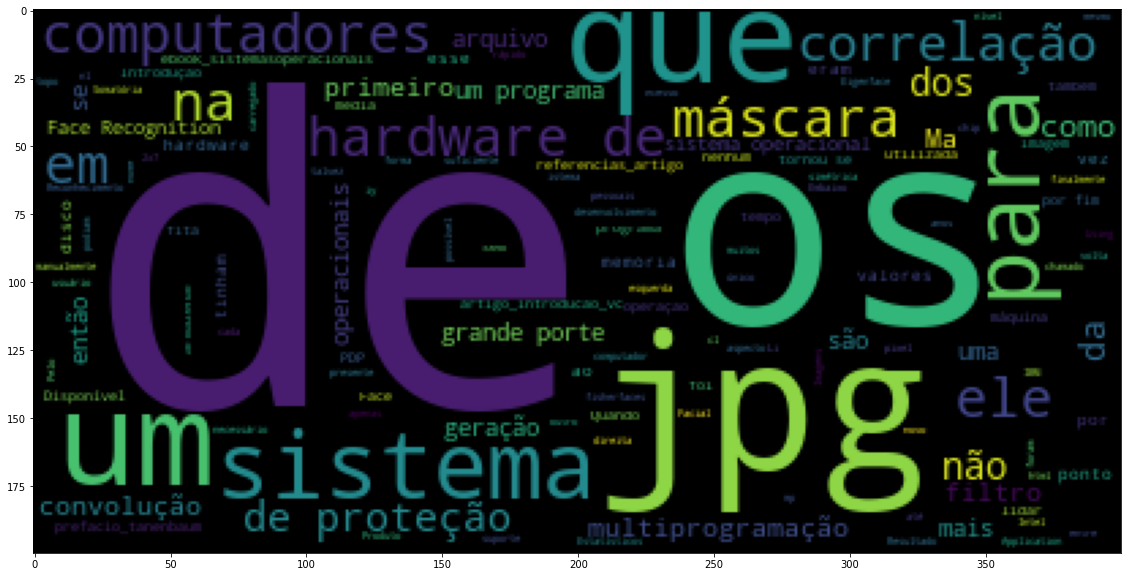

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(texto_completo));

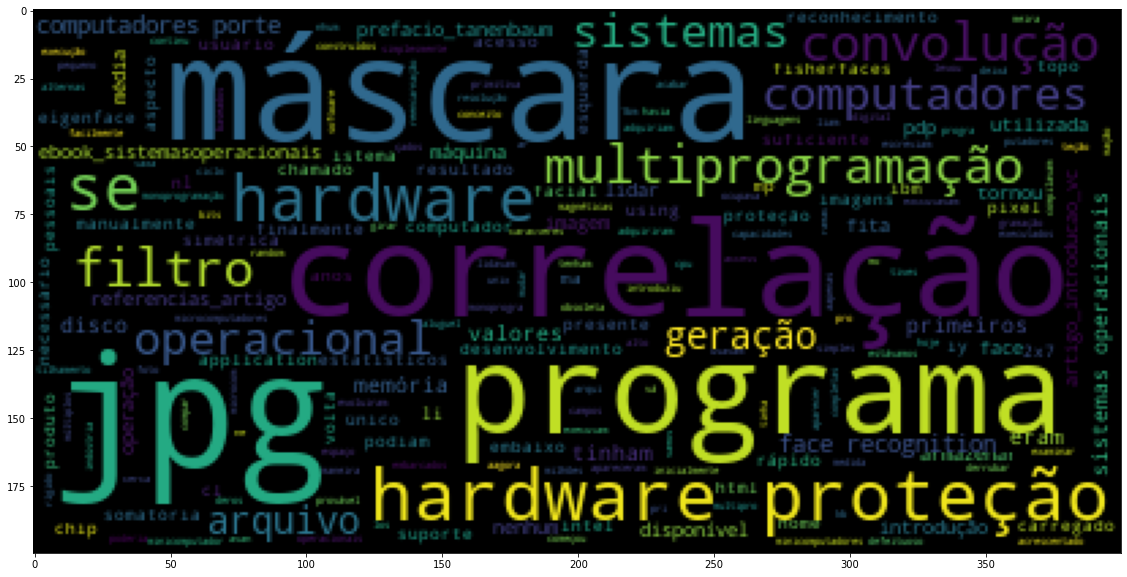

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(texto_completo_processado));

## Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
documento = pln(texto_completo_processado)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
for entidade in documento.ents:
  if entidade.label_ == 'LOC':
    print(entidade.text, entidade.label_)

china LOC
santana LOC
jailton LOC
junior LOC
universidade imes — sp LOC


# Reconhecimento nas imagens

## Função para escrever sobre a imagem

In [ ]:
fonte_dir = '/content/calibri.ttf'

In [ ]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img) 
  draw = ImageDraw.Draw(img_pil) 
  draw.text((x, y-tamanho), texto, font = fonte, fill = cor) 
  img = np.array(img_pil) 

  return img

## Função para mostrar detecção na imagem

In [ ]:
min_conf = 30  #@param {type:"slider", min:0, max:100}

Função para extrair os dados da caixa delimitadora e desenhar ela ao redor dos textos 

In [ ]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]
    
  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [ ]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)
  num_ocorrencias = 0
  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
      texto = resultado['text'][i]
      if termo_pesquisa in texto:
        x, y, img = caixa_texto(i, resultado, img, (0,0,255))
        img = escreve_texto(texto, x, y, img, fonte_dir, (50,50,225), 14)
        num_ocorrencias += 1
  return img, num_ocorrencias

## Buscando pelo termo 

ebook_sistemasoperacionais.jpg
Número de ocorrências para computador em ebook_sistemasoperacionais.jpg: 10




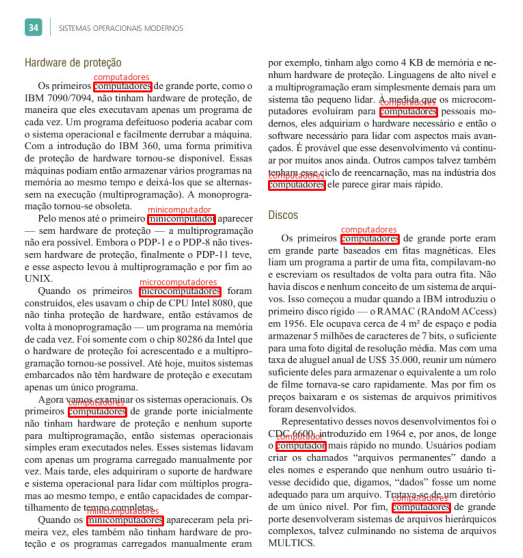

prefacio_tanenbaum.jpg
Número de ocorrências para computador em prefacio_tanenbaum.jpg: 5




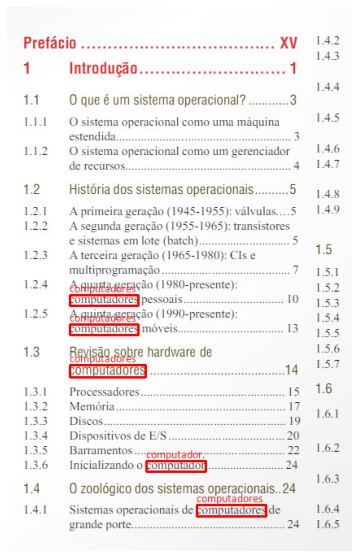

referencias_artigo.jpg
Número de ocorrências para computador em referencias_artigo.jpg: 0




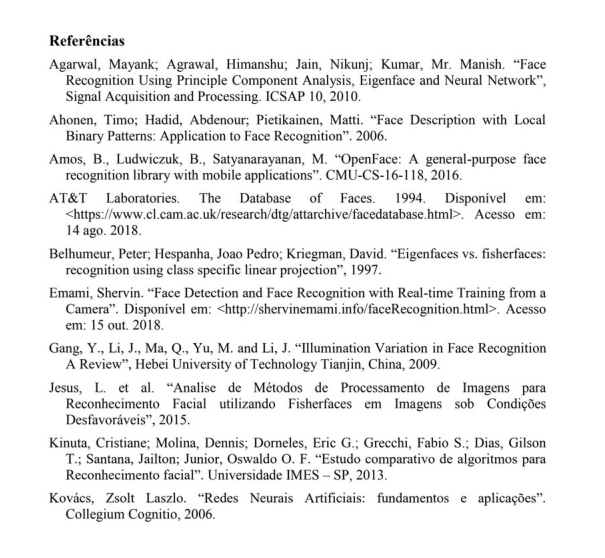

artigo_introducao_vc.jpg
Número de ocorrências para computador em artigo_introducao_vc.jpg: 0




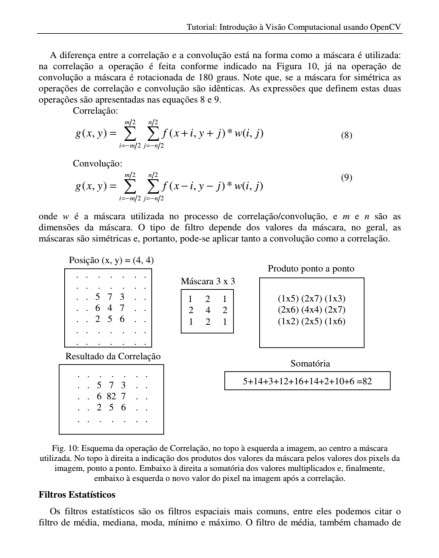

In [ ]:
termo_pesquisa = 'computador'
for imagem in caminhos:
  if imagem == 'imagens/imagens2':
    continue
  img = cv2.imread(imagem)
  img_original = img.copy()

  nome_imagem = os.path.split(imagem)[-1]
  print('===================\n' + str(nome_imagem))

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
  print('\n')

  mostrar(img)

## Caracteres maiúsculos e minúsculos

In [ ]:
diretorio_imgs = "imagens/imagens2/"
caminhos = [os.path.join(diretorio_imgs, f) for f in os.listdir(diretorio_imgs)]
print(caminhos)

['imagens/imagens2/caixa-refrigerador.jpg', 'imagens/imagens2/receita02.jpg', 'imagens/imagens2/informacao_nutricional.jpg']


In [ ]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)
  num_ocorrencias = 0
  for i in range(0, len(resultado['text'])):
    confianca = int(resultado['conf'][i])
    if confianca > min_conf:
      texto = resultado['text'][i]    
      if termo_pesquisa.lower() in texto.lower():
        x, y, img = caixa_texto(i, resultado, img, (0,0,255))
        img = escreve_texto(texto, x, y, img, fonte_dir, (50,50,225), 14)
        num_ocorrencias += 1
  
  return img, num_ocorrencias

caixa-refrigerador.jpg
Número de ocorrências para reFriGerador em caixa-refrigerador.jpg: 1




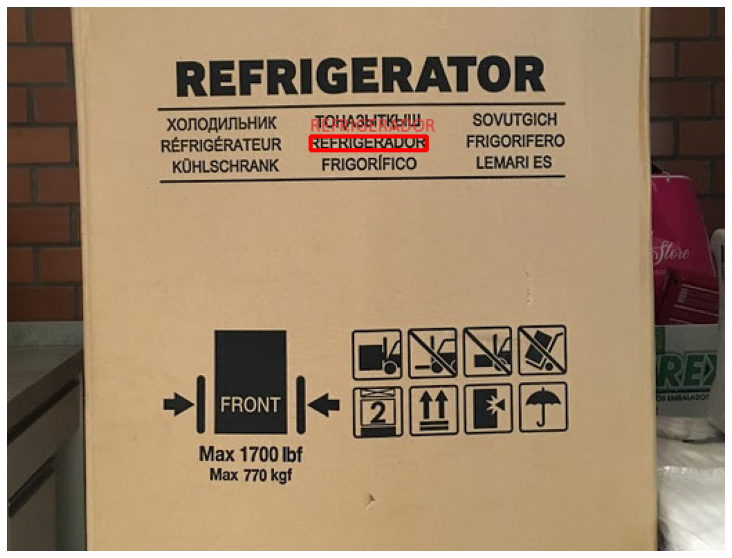

receita02.jpg
Número de ocorrências para reFriGerador em receita02.jpg: 0




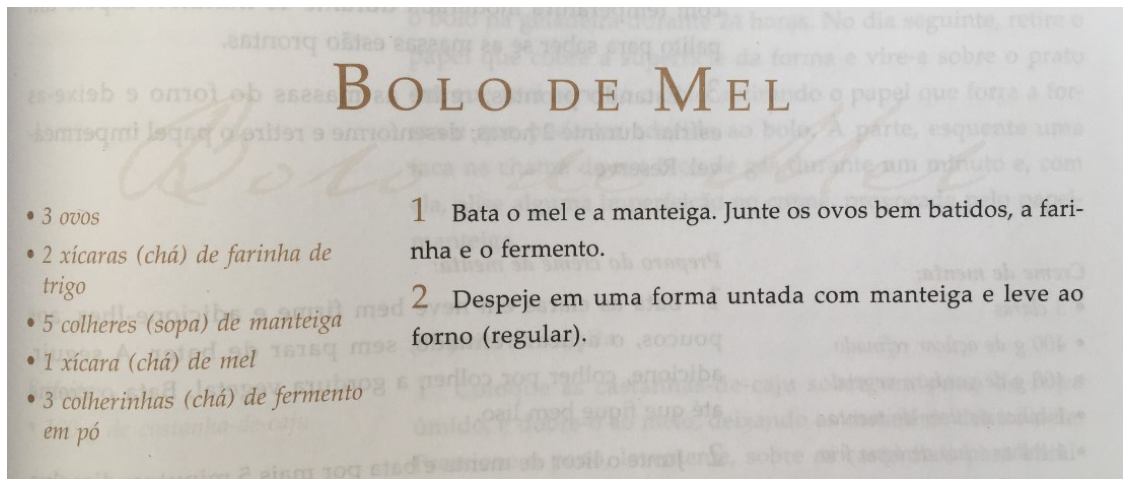

informacao_nutricional.jpg
Número de ocorrências para reFriGerador em informacao_nutricional.jpg: 0




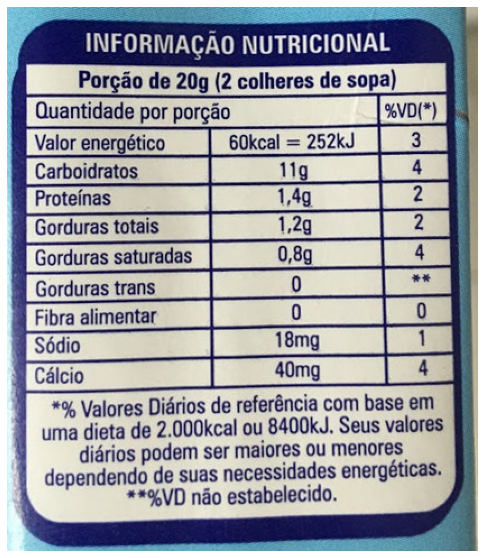

In [ ]:
termo_pesquisa = 'reFriGerador'
for imagem in caminhos:
  if imagem == 'imagens/imagens2':
    continue
  img = cv2.imread(imagem)
  img_original = img.copy()

  nome_imagem = os.path.split(imagem)[-1]
  print('===================\n' + str(nome_imagem))

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
  print('\n')

  mostrar(img)

## Salvando as imagens 

In [ ]:
termo_pesquisa = 'sopa'

In [ ]:
os.makedirs('imagens_processadas', exist_ok=True)

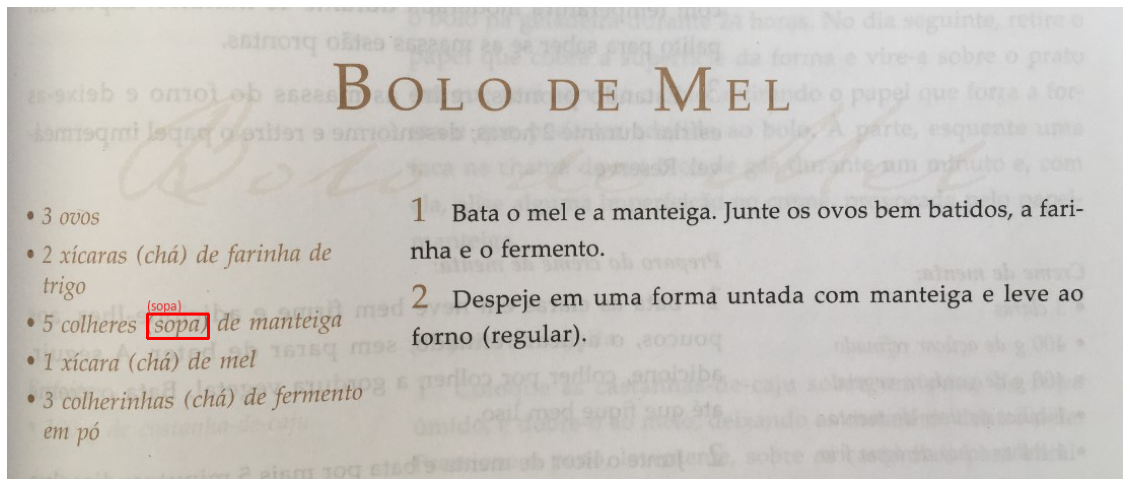

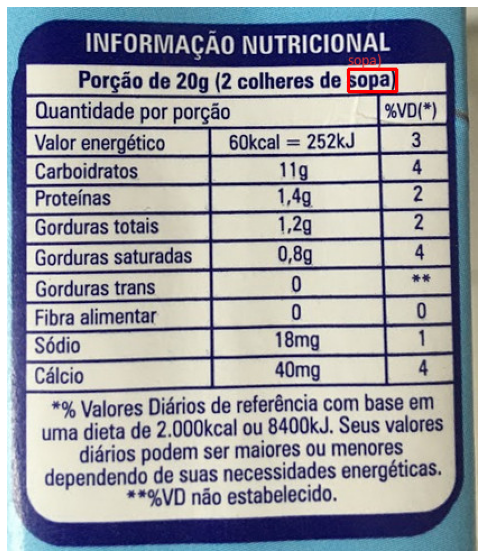

In [ ]:
for imagem in caminhos:
  img = cv2.imread(imagem)
  img_original = img.copy()
  nome_imagem = os.path.split(imagem)[-1]
  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)
  if numero_ocorrencias > 0:
    mostrar(img)
    novo_nome_imagem = 'process_' + nome_imagem
    nova_imagem = 'imagens_processadas/' + str(novo_nome_imagem)
    cv2.imwrite(nova_imagem, img)